In [ ]:
right code

# Scenario 1 CSP:

In [9]:

from constraint import Problem, AllDifferentConstraint, FunctionConstraint

people_skills = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

list_skills = ["Python", "AI", "Web", "Database", "Systems"]

# Using a function to check all combination for a group of 3 people besides Ciara
# Using a sum to verify if the number of AI is = 2
def satisfies_constraints(combination, people_skills, list_skills):
    combined_skills = [skill for person in combination for skill in people_skills.get(person, [])]
    return all(skill in combined_skills for skill in desired_skills) and \
           sum("AI" in people_skills[person] for person in combination) >= 2

# Checking to make shure that Ciara is in output seletion
def include_ciara(combination):
    if "Ciara" not in combination:
        combination.append("Ciara")
    return combination

# Checkin all possible combnation for a group of 3 people besides Ciara
def csp_backtracking(variables, domains, list_skills):
    def backtrack(assignment, start_index=0):
        if len(assignment) == 3:
            if satisfies_constraints(assignment, people_skills, list_skills):
                return [assignment]
            else:
                return []
        else:
            result = []
            for i in range(start_index, len(variables)):
                if variables[i] not in assignment:
                    result.extend(backtrack(assignment + [variables[i]], i + 1))
            return result

    return backtrack([])

# Print the combinations generated by backtracking
combinations = csp_backtracking(list(people_skills.keys()), people_skills, list_skills)

Combination_num = 1
print("Combinations generated by backtracking:")
for combination in combinations:
    combination_with_ciara = include_ciara(combination)
    
    print(f"Combination {Combination_num}:")
    for person in combination_with_ciara:
        skills = ', '.join(people_skills[person])
        print(f"{person}: {skills}")
    print()
    Combination_num += 1


Combinations generated by backtracking:
Combination 1:
Juan: Web, AI
Jim: AI, Systems
Jane: Python, Database
Ciara: Python

Combination 2:
Jim: AI, Systems
Jane: Python, Database
Anita: Web, AI
Ciara: Python



# Scenario 1 Visualization:
Use appropriate visualisations to help communicate the CSP scenario and the corresponding solutions, if any, to the appropriate stakeholders.
 

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


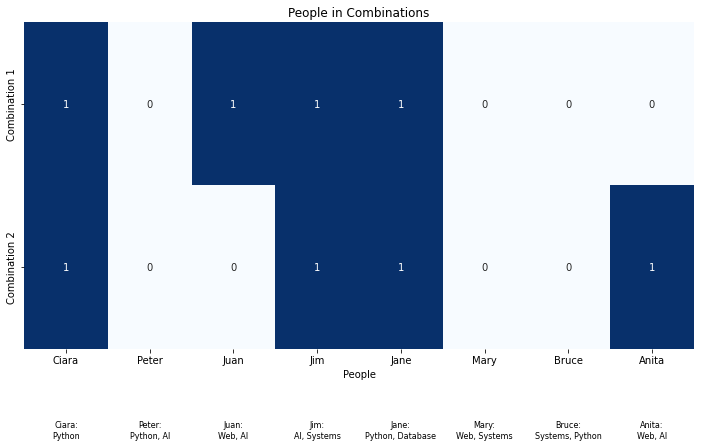

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a binary matrix to represent people in combinations
matrix = np.zeros((len(combinations), len(people_skills)), dtype=int)

for i, combination in enumerate(combinations):
    for j, person in enumerate(people_skills.keys()):
        if person in combination:
            matrix[i, j] = 1

# Plot the matrix as a heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(matrix, cmap='Blues', annot=True, cbar=False, xticklabels=list(people_skills.keys()), yticklabels=[f'Combination {i+1}' for i in range(len(combinations))])

# Add labels with skills
skills_labels = {
    
    "Ciara": "Python",
    "Peter": "Python, AI",
    "Juan": "Web, AI",
    "Jim": "AI, Systems",
    "Jane": "Python, Database",
    "Mary": "Web, Systems",
    "Bruce": "Systems, Python",
    "Anita": "Web, AI"
}

for i, person in enumerate(people_skills.keys()):
    if person in skills_labels:
        skills_text = skills_labels[person]
        ax.text(i + 0.5, len(combinations) + 0.5, f"{person}:\n{skills_text}", ha='center', va='center', fontsize=8, color='black')

# Set axis labels
plt.xlabel('People')
plt.title('People in Combinations')

# Display the plot
plt.show()


# Scenario 1Interactive Visualisasion:
Create interactive visualisation(s) to allow a user to explore alternate constraint scenarios


In [10]:
import plotly.express as px
import pandas as pd

data = {
    "Ciara": [1, 0, 0, 0, 0],
    "Peter": [1, 1, 0, 0, 0],
    "Juan": [0, 1, 1, 0, 0],
    "Jim": [0, 1, 0, 1, 0],
    "Jane": [1, 0, 0, 0, 1],
    "Mary": [0, 0, 1, 1, 0],
    "Bruce": [1, 0, 0, 1, 0],
    "Anita": [0, 1, 1, 0, 0]
}

skills = ["Python", "AI", "Web", "Systems", "Database"]
combination1 = ["Juan", "Jim", "Jane", "Ciara"]
combination2 = ["Jim", "Jane", "Anita", "Ciara"]

df_skills = pd.DataFrame(data).T
df_skills.columns = skills

df_combinations = pd.concat([df_skills.loc[combination1], df_skills.loc[combination2]])

fig_combined = px.bar(df_combinations, barmode='group',
                      color_discrete_map={'Juan': 'orange', 'Jim': 'green', 'Jane': 'blue', 'Anita': 'red'},
                      labels={'value': 'Skill Presence (1) or Absence (0)', 'index': 'People'},
                      title='Combined Skills Matrix and Combinations',
                      width=800, height=500)

fig_combined.update_layout(xaxis=dict(tickangle=45, tickmode='array'))

fig_combined.show()



# Scanario 1 GUI:  
Create GUI(s) to allow a user to explore alternate constraint scenarios

In [40]:
import tkinter as tk
from tkinter import ttk
people_skills = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

desired_skills = ["Python", "AI", "Web", "Database", "Systems"]

# Define combinations
combination1 = ["Juan", "Jim", "Jane", "Ciara"]
combination2 = ["Jim", "Jane", "Anita", "Ciara"]

def check_combinations():
    selected_people_names = [person for person, var in zip(people_skills.keys(), person_vars) if var.get()]

    if set(selected_people_names) == set(combination1):
        result_label.config(text="Matches Combination 1")
    elif set(selected_people_names) == set(combination2):
        result_label.config(text="Matches Combination 2")
    else:
        result_label.config(text="No Match")

def restart():
    result_label.config(text="")
    for var in person_vars:
        var.set(False)

# GUI setup
root = tk.Tk()
root.title("Skills Combination Checker")
# Set the initial size of the window
root.geometry("300x300")

# Checkboxes to select people
person_vars = [tk.BooleanVar() for _ in people_skills]
for i, (person, var) in enumerate(zip(people_skills.keys(), person_vars)):
    ttk.Checkbutton(root, text=person, variable=var).grid(row=i, column=0, sticky=tk.W)

# Button to check combinations
check_button = ttk.Button(root, text="Check", command=check_combinations)
check_button.grid(row=len(people_skills), column=0, pady=5)

# Result label
result_label = ttk.Label(root, text="")
result_label.grid(row=len(people_skills) + 1, column=0, pady=5)

# Button to restart
restart_button = ttk.Button(root, text="Restart", command=restart)
restart_button.grid(row=len(people_skills) + 2, column=0, pady=10)

root.mainloop()

# Scenario 2 CSP                                       
For the second scnario I ensured that Ciara and Juan to be in my list, but there is no need to hiring 4 more people because just Ciara, Juan and 3 more people fill up all rolles:                                                                                  



Note that in my 1 combnation there are only 5 people Ciara, Juan + 3 more people that fill all rolles.




In my 2 combnation I have 6 Ciare, Juan + 4 people, but there is no need 6 people.                                                               



In my 3 combnation again I have 5 person, total of combination if we consider that we can have Ciara and Juan + 4 person = 3.             

In [15]:
from constraint import Problem, AllDifferentConstraint, FunctionConstraint

people_skills = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

desired_skills = ["Python", "AI", "Web", "Database", "Systems"]

# Define a function to check if a combination satisfies the constraints
def satisfies_constraints(combination, people_skills, desired_skills):
    combined_skills = [skill for person in combination for skill in people_skills.get(person, [])]
    return all(skill in combined_skills for skill in desired_skills) and \
           sum("AI" in people_skills[person] for person in combination) >= 3

# Define a function to include Juan and Ciara with specified skills if not present in the combination
def include_juan_and_ciara(combination):
    if "Juan" not in combination:
        combination.append("Juan")
    if "Ciara" not in combination:
        combination.append("Ciara")
    return combination

# Define a function for the CSP using backtracking with combinations of length 4
def csp_backtracking(variables, domains, desired_skills):
    def backtrack(assignment, start_index=0):
        if len(assignment) == 4:
            if satisfies_constraints(assignment, people_skills, desired_skills):
                return [assignment]
            else:
                return []
        else:
            result = []
            for i in range(start_index, len(variables)):
                if variables[i] not in assignment:
                    result.extend(backtrack(assignment + [variables[i]], i + 1))
            return result

    return backtrack([])

# Print the combinations generated by backtracking
combinations = csp_backtracking(list(people_skills.keys()), people_skills, desired_skills)

Combination_num = 1
print("Combinations generated by backtracking:")
for combination in combinations:
    combination_with_juan_and_ciara = include_juan_and_ciara(combination)
    
    print(f"Combination {Combination_num}:")
    for person in combination_with_juan_and_ciara:
        skills = ', '.join(people_skills[person])
        print(f"{person}: {skills}")
    print()
    Combination_num += 1


Combinations generated by backtracking:
Combination 1:
Peter: Python, AI
Juan: Web, AI
Jim: AI, Systems
Jane: Python, Database
Ciara: Python

Combination 2:
Peter: Python, AI
Jim: AI, Systems
Jane: Python, Database
Anita: Web, AI
Juan: Web, AI
Ciara: Python

Combination 3:
Juan: Web, AI
Jim: AI, Systems
Jane: Python, Database
Anita: Web, AI
Ciara: Python



# Scanario 2 Visualisation:  


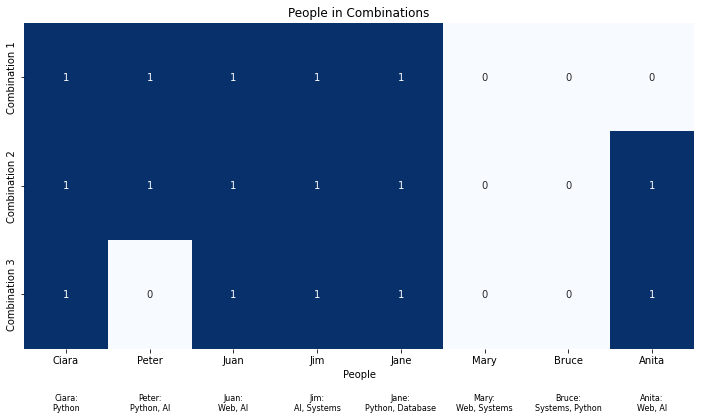

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a binary matrix to represent people in combinations
matrix = np.zeros((len(combinations), len(people_skills)), dtype=int)

for i, combination in enumerate(combinations):
    for j, person in enumerate(people_skills.keys()):
        if person in combination:
            matrix[i, j] = 1

# Plot the matrix as a heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(matrix, cmap='Blues', annot=True, cbar=False, xticklabels=list(people_skills.keys()), yticklabels=[f'Combination {i+1}' for i in range(len(combinations))])

# Add labels with skills
skills_labels = {
    
    "Ciara": "Python",
    "Peter": "Python, AI",
    "Juan": "Web, AI",
    "Jim": "AI, Systems",
    "Jane": "Python, Database",
    "Mary": "Web, Systems",
    "Bruce": "Systems, Python",
    "Anita": "Web, AI"
}

for i, person in enumerate(people_skills.keys()):
    if person in skills_labels:
        skills_text = skills_labels[person]
        ax.text(i + 0.5, len(combinations) + 0.5, f"{person}:\n{skills_text}", ha='center', va='center', fontsize=8, color='black')

# Set axis labels
plt.xlabel('People')
plt.title('People in Combinations')

# Display the plot
plt.show()


#  Scenario 2 Interactive Visualisasion:
Create interactive visualisation(s) to allow a user to explore alternate constraint scenarios


In [4]:
import plotly.express as px
import pandas as pd

data = {
    "Ciara": [1, 0, 0, 0, 0],
    "Peter": [1, 1, 0, 0, 0],
    "Juan": [0, 1, 1, 0, 0],
    "Jim": [0, 1, 0, 1, 0],
    "Jane": [1, 0, 0, 0, 1],
    "Mary": [0, 0, 1, 1, 0],
    "Bruce": [1, 0, 0, 1, 0],
    "Anita": [0, 1, 1, 0, 0]
}

skills = ["Python", "AI", "Web", "Systems", "Database"]
combination1 = ["Peter", "Juan", "Jim", "Jane", "Ciara"]
combination2 = ["Peter", "Jim", "Jane", "Anita", "Juan", "Ciara"]
combination3 = ["Juan", "Jim", "Jane", "Anita", "Ciara"]

df_skills = pd.DataFrame(data).T
df_skills.columns = skills

df_combination1 = df_skills.loc[combination1]
df_combination2 = df_skills.loc[combination2]
df_combination3 = df_skills.loc[combination3]

df_combinations = pd.concat([df_combination1, df_combination2, df_combination3])

fig_combined = px.bar(df_combinations, barmode='group',
                      color_discrete_map={'Peter': 'orange', 'Juan': 'green', 'Jim': 'blue', 'Jane': 'red', 'Anita': 'purple'},
                      labels={'value': 'Skill Presence (1) or Absence (0)', 'index': 'People'},
                      title='Combined Skills Matrix and Combinations',
                      width=800, height=500)

fig_combined.update_layout(xaxis=dict(tickangle=45, tickmode='array'))

fig_combined.show()


#  Scanario 2 GUI:  
Create GUI(s) to allow a user to explore alternate constraint scenarios

In [27]:
import tkinter as tk
from tkinter import ttk

people_skills = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

desired_skills = ["Python", "AI", "Web", "Database", "Systems"]

# Define combinations
combination_1 = ["Peter", "Juan", "Jim", "Jane", "Ciara"]
combination_2 = ["Peter", "Jim", "Jane", "Anita", "Juan", "Ciara"]
combination_3 = ["Juan", "Jim", "Jane", "Anita", "Ciara"]

def check_combinations():
    selected_people_names = [person for person, var in zip(people_skills.keys(), person_vars) if var.get()]

    if set(selected_people_names) == set(combination_1):
        result_label.config(text="Matches Combination 1")
    elif set(selected_people_names) == set(combination_2):
        result_label.config(text="Matches Combination 2")
    elif set(selected_people_names) == set(combination_2):
        result_label.config(text="Matches Combination 3")
    else:
        result_label.config(text="No Match")

def restart():
    result_label.config(text="")
    for var in person_vars:
        var.set(False)

# GUI setup
root = tk.Tk()
root.title("Skills Combination Checker")
# Set the initial size of the window
root.geometry("300x300")

# Checkboxes to select people
person_vars = [tk.BooleanVar() for _ in people_skills]
for i, (person, var) in enumerate(zip(people_skills.keys(), person_vars)):
    ttk.Checkbutton(root, text=person, variable=var).grid(row=i, column=0, sticky=tk.W)

# Button to check combinations
check_button = ttk.Button(root, text="Check Combinations", command=check_combinations)
check_button.grid(row=len(people_skills), column=0, pady=5)

# Result label
result_label = ttk.Label(root, text="")
result_label.grid(row=len(people_skills) + 1, column=0, pady=5)

# Button to restart
restart_button = ttk.Button(root, text="Restart", command=restart)
restart_button.grid(row=len(people_skills) + 2, column=0, pady=10)

root.mainloop()